In [1]:
#importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
from scipy import stats
from sklearn.metrics import mean_squared_error

e:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Setting Working directory
os.chdir("D:\\edwisor\\Cab_Fare")  

In [3]:
#loading data
train_data = pd.read_csv("train_cab.csv")
test_data = pd.read_csv("test.csv")

In [4]:
#First five elements of train_data
train_data.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
train_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [6]:
#information of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [7]:
#first five elements of test data
test_data.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
#description of test data
test_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [9]:
#info of test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [10]:
#Shape of train and test data
print("Shape of train data: {}".format(train_data.shape))
print("Shape of test data: {}".format(test_data.shape))

Shape of train data: (16067, 7)
Shape of test data: (9914, 6)


In [11]:
#we have to convert 'fare_amount' into float but there is a invalid value which we have to change
train_data[train_data['fare_amount']=='430-']

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1123,430-,2009-09-22 19:01:01 UTC,-73.97961,40.771326,-73.975764,40.781965,1.0


In [12]:
train_data['fare_amount'][1123]=np.nan

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
train_data['fare_amount']= train_data['fare_amount'].astype('float64')

# MISSING VALUE ANALYSIS

In [14]:
data=train_data.copy()
#train_data=data.copy()

In [15]:
#counting the number of missing values for each variable
nulls = pd.DataFrame(train_data.isnull().sum().sort_values(ascending=False))
nulls.index.name='Variables'
nulls.columns = ['Count of null']
nulls['Percentage'] = (nulls['Count of null']/train_data.shape[0])*100
nulls.reset_index(inplace=True)
nulls

,Variables,Count of null,Percentage
0,passenger_count,55,0.342317
1,fare_amount,25,0.155598
2,dropoff_latitude,0,0.000000
3,dropoff_longitude,0,0.000000
4,pickup_latitude,0,0.000000
5,pickup_longitude,0,0.000000
6,pickup_datetime,0,0.000000


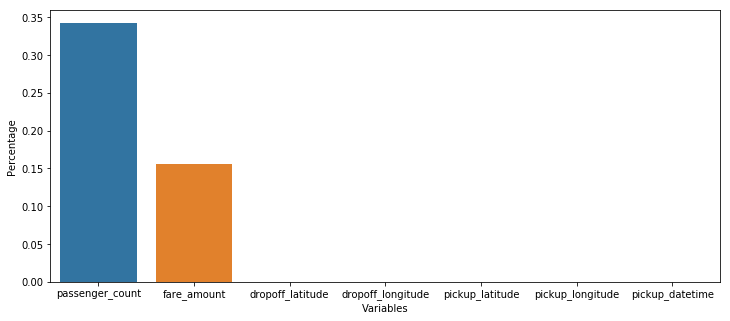

In [16]:
plt.subplots(figsize=(12,5))
sns.barplot(nulls['Variables'],nulls['Percentage'])

In [17]:
#Only two columns contained the missing data and the percentage is quite low hence we will remove the samples which have null values

In [18]:
#removing the samples containing null value
train_data=train_data.dropna()

In [19]:
train_data.reset_index(drop=True,inplace=True)

In [20]:
#checking again
train_data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [21]:
#new dimension of train data
train_data.shape

(15987, 7)

# OUTLIER ANALYSIS

In [22]:
#We would be now plotting the box plots of several continuous variables

In [23]:
train_data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [24]:
col = ['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude']

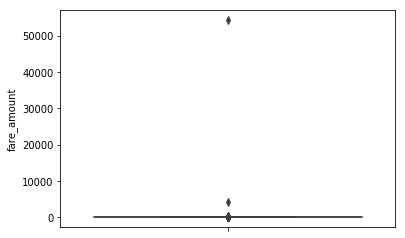

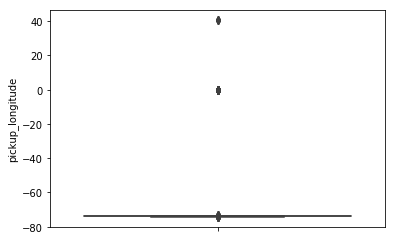

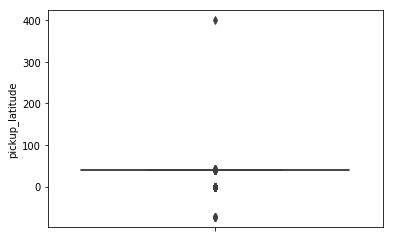

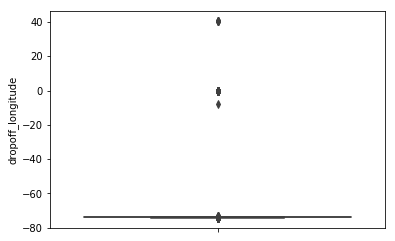

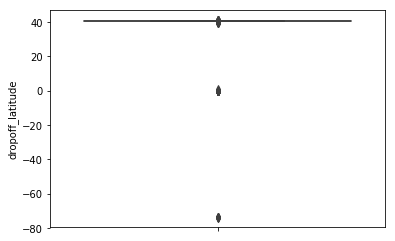

In [25]:
for i in col:
    sns.boxplot(y=train_data[i])
    plt.show()

In [26]:
data=train_data.copy
#train_data= data.copy

In [27]:
##code to count the number of outliers in each variable
for i in col:
    print(i)
    count=0
    q75, q25= np.percentile(train_data[i],[75,25])
    iqr = q75 - q25
    maxm = q75 + (iqr*1.5)
    minm = q25 - (iqr*1.5)
    for j in range(0,train_data.shape[0]):
        if(train_data[i][j]>maxm or train_data[i][j]<minm):
            count=count+1
    print(count)

fare_amount
1394
pickup_longitude
1110
pickup_latitude
786
dropoff_longitude
1170
dropoff_latitude
1002


In [28]:
##code to replace the outliers
for i in col:
    count=0
    q75, q25= np.percentile(train_data[i],[75,25])
    iqr = q75 - q25
    maxm = q75 + (iqr*1.5)
    minm = q25 - (iqr*1.5)
    for j in range(0,train_data.shape[0]):
        if(train_data[i][j]>maxm):
            train_data[i][j]=maxm

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [29]:
for i in col:
    count=0
    q75, q25= np.percentile(train_data[i],[75,25])
    iqr = q75 - q25
    maxm = q75 + (iqr*1.5)
    minm = q25 - (iqr*1.5)
    for j in range(0,train_data.shape[0]):
        if(train_data[i][j]<minm):
            train_data[i][j]=minm

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
#rechecking the number of outliers
for i in col:
    print(i)
    count=0
    q75, q25= np.percentile(train_data[i],[75,25])
    iqr = q75 - q25
    maxm = q75 + (iqr*1.5)
    minm = q25 - (iqr*1.5)
    for j in range(0,train_data.shape[0]):
        if(train_data[i][j]>maxm or train_data[i][j]<minm):
            count=count+1
    print(count)

fare_amount
0
pickup_longitude
0
pickup_latitude
0
dropoff_longitude
0
dropoff_latitude
0


In [31]:
train_data[train_data['fare_amount']<0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1977,-2.9,2010-03-09 23:37:10 UTC,-73.928833,40.686290,-73.922338,40.684621,1.0
2419,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1.0
12953,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4.0


In [32]:
for i in range(0,train_data.shape[0]):
    if(train_data['fare_amount'][i]<0):
        train_data['fare_amount'][i]=0.01

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
train_data['passenger_count'].value_counts()

1.00       11242
2.00        2319
5.00        1044
3.00         675
4.00         328
6.00         301
0.00          57
43.00          2
53.00          2
536.00         1
535.00         1
5345.00        1
35.00          1
5334.00        1
554.00         1
537.00         1
0.12           1
1.30           1
531.20         1
345.00         1
456.00         1
557.00         1
354.00         1
58.00          1
236.00         1
87.00          1
Name: passenger_count, dtype: int64

In [34]:
train_data['passenger_count']=train_data['passenger_count'].astype('int64')

In [35]:
for i in range(0,train_data.shape[0]):
    if(train_data['passenger_count'][i]>6):
        train_data['passenger_count'][i]=6
    elif(train_data['passenger_count'][i]==0):
        train_data['passenger_count'][i]=1

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [36]:
train_data['passenger_count'].value_counts()

1    11301
2     2319
5     1044
3      675
4      328
6      320
Name: passenger_count, dtype: int64

# Feature Selection

In [37]:
#adding a new feature i.e distance

In [38]:
data=train_data.copy()
#train_data=data.copy()

In [39]:
train_data['distance']=train_data['pickup_longitude']-train_data['pickup_latitude']

In [58]:
from math import sin, cos, sqrt, atan2,radians

R = 6373.0

def find_distance(lon1,lat1,lon2,lat2):
    dlon = radians(lon2) - radians(lon1)
    dlat = radians(lat2) - radians(lat1)
    a = (sin(dlat/2))**2 + cos(radians(lat1)) * cos(radians(lat2)) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

In [59]:
for i in range(0,train_data.shape[0]):
    train_data['distance'][i]= find_distance(train_data['pickup_longitude'][i],train_data['pickup_latitude'][i],train_data['dropoff_longitude'][i],train_data['dropoff_latitude'][i])

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.928833,40.721319,-73.922338,40.712278,1,1.145054
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.452786
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389961
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.800149
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999784


# Variance inflation factor

In [62]:
num = pd.DataFrame(train_data.select_dtypes(include=np.number))
cor = num.corr()        #correlation between numerical variables
cor

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
fare_amount,1.000000,0.146163,-0.112146,0.233893,-0.103799,0.014465,0.792112
pickup_longitude,0.146163,1.000000,0.258986,0.422428,0.071984,-0.005096,0.039977
pickup_latitude,-0.112146,0.258986,1.000000,0.040123,0.513865,-0.002905,-0.074345
dropoff_longitude,0.233893,0.422428,0.040123,1.000000,0.251440,-0.008246,0.161677
dropoff_latitude,-0.103799,0.071984,0.513865,0.251440,1.000000,-0.002796,-0.025467
passenger_count,0.014465,-0.005096,-0.002905,-0.008246,-0.002796,1.000000,0.001785
distance,0.792112,0.039977,-0.074345,0.161677,-0.025467,0.001785,1.000000


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(num)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const                2.596252e+07
fare_amount          2.925835e+00
pickup_longitude     1.399047e+00
pickup_latitude      1.556862e+00
dropoff_longitude    1.441208e+00
dropoff_latitude     1.567970e+00
passenger_count      1.000658e+00
distance             2.759796e+00
dtype: float64

# EDA

In [97]:
train=train_data.copy()

In [98]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.928833,40.721319,-73.922338,40.712278,1,1.145054
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.452786
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389961
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.800149
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999784


In [103]:
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [104]:
train.set_index('pickup_datetime',inplace=True)
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
pickup_datetime,,,,,,,
2009-06-15 17:26:21,4.5,-73.928833,40.721319,-73.922338,40.712278,1,1.145054
2010-01-05 16:52:16,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.452786
2011-08-18 00:35:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389961
2012-04-21 04:30:42,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.800149
2010-03-09 07:51:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999784


In [152]:
for i in ['2009','2010','2011','2012','2013','2014','2015']:
    print("number of customers in year {} is {}".format(i,train[i].shape[0]))

number of customers in year 2009 is 2469
number of customers in year 2010 is 2491
number of customers in year 2011 is 2496
number of customers in year 2012 is 2573
number of customers in year 2013 is 2508
number of customers in year 2014 is 2304
number of customers in year 2015 is 1146


In [166]:
train['fare_amount'].resample('y').mean()

pickup_datetime
2009-12-31     9.240871
2010-12-31     9.138840
2011-12-31     9.414864
2012-12-31    10.104858
2013-12-31    10.826750
2014-12-31    11.174609
2015-12-31    11.247504
Freq: A-DEC, Name: fare_amount, dtype: float64

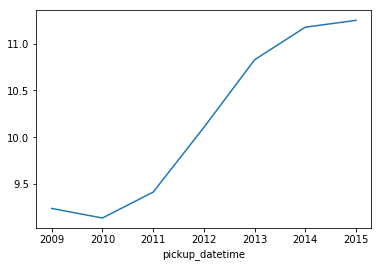

In [123]:
train['fare_amount'].resample('y').mean().plot()

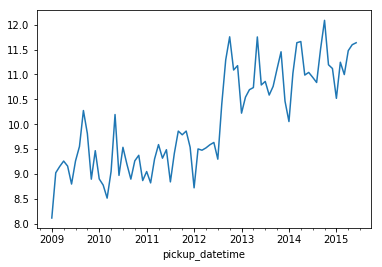

In [124]:
train['fare_amount'].resample('m').mean().plot()

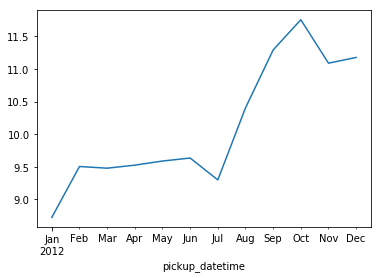

In [163]:
train['2012-01-01 00:00:01':'2012-12-31 23:59:59'].fare_amount.resample('m').mean().plot()

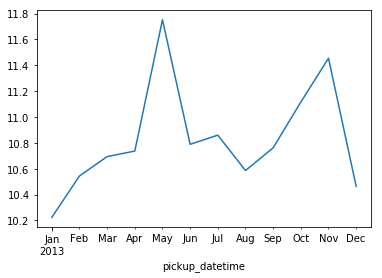

In [164]:
train['2013-01-01 00:00:01':'2013-12-31 23:59:59'].fare_amount.resample('m').mean().plot()

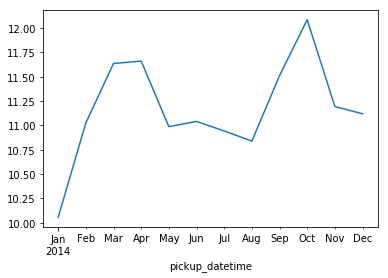

In [165]:
train['2014-01-01 00:00:01':'2014-12-31 23:59:59'].fare_amount.resample('m').mean().plot()

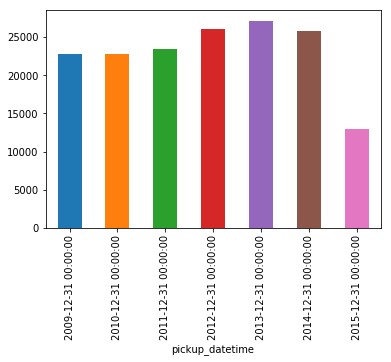

In [290]:
train['fare_amount'].resample('y').sum().plot(kind='bar')

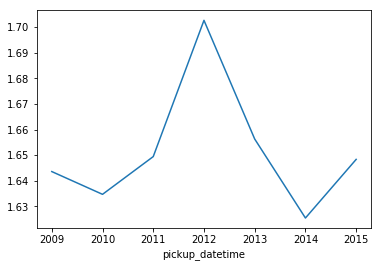

In [194]:
train.passenger_count.resample('y').mean().plot()

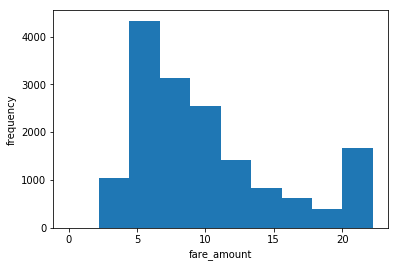

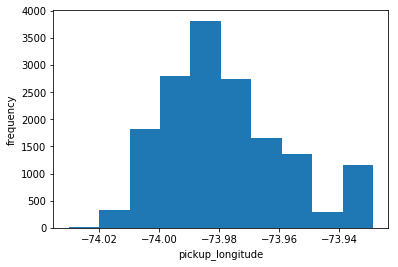

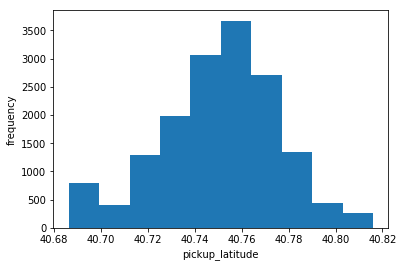

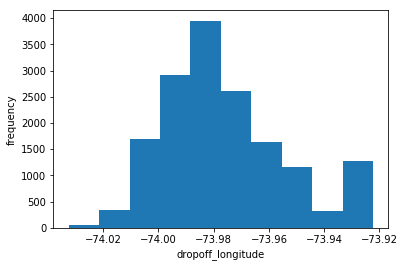

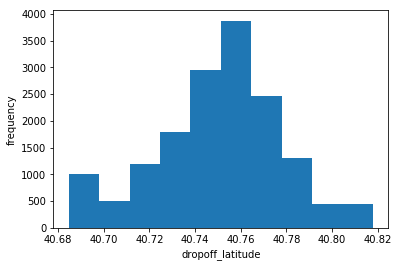

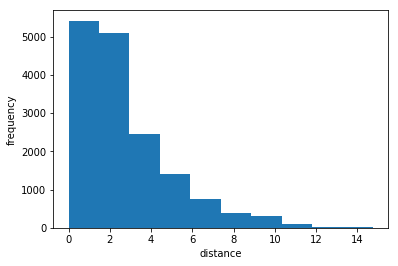

In [137]:
cols=['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance']
for i in cols:
    plt.hist(train[i])
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.show()

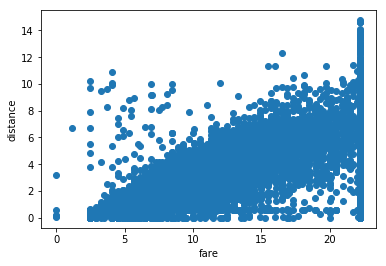

In [140]:
plt.scatter(y=train['distance'],x=train['fare_amount'])
plt.xlabel('fare')
plt.ylabel('distance')
plt.show()

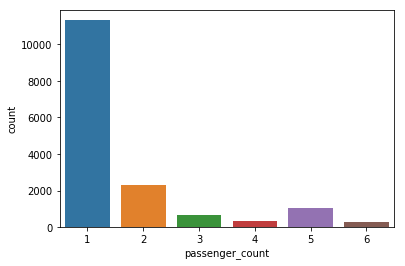

In [141]:
sns.countplot(train['passenger_count'])

In [144]:
z=train[['passenger_count','fare_amount']].groupby('passenger_count',as_index=False).mean()
z

,passenger_count,fare_amount
0,1,9.965044
1,2,10.439073
2,3,10.244637
3,4,10.366341
4,5,9.908554
5,6,10.582187


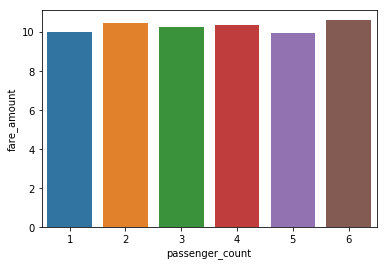

In [145]:
sns.barplot(z['passenger_count'],z['fare_amount'])

# Feature Scaling

In [195]:
#Standarisation
for i in cols:
    print(i)
    train_data[i] = (train_data[i] - train_data[i].mean())/train_data[i].std()

fare_amount
pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
distance


In [196]:
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,-1.018465,2009-06-15 17:26:21 UTC,2.374826,-1.121161,2.345882,-1.356159,1,-0.733728
1,1.251908,2010-01-05 16:52:16 UTC,-1.829626,-1.508867,-0.144882,1.113702,1,2.528037
2,-0.798751,2011-08-18 00:35:00 UTC,-0.223812,0.425286,-0.668762,-0.000049,2,-0.624415
3,-0.432562,2012-04-21 04:30:42 UTC,-0.435542,-0.663471,-0.682981,0.266682,1,0.005014
4,-0.871989,2010-03-09 07:51:00 UTC,0.482101,0.686104,0.844470,1.175975,1,-0.352224


# Modeling

In [237]:
y=train_data['fare_amount']
X=train_data.drop(['fare_amount','pickup_datetime'],axis=1)

In [238]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=31)

# Linear Regression

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

lr=LinearRegression()
lr.fit(X_train,y_train)

#metrics for validation

#RMSE for test data to check accuracy
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

#MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test))

#k-fold cross validation test
accuracies = cross_val_score(estimator= lr, X=X_train , y=y_train , cv=10)
mean= accuracies.mean()
std= accuracies.std()

#R2 score
r=r2_score(y_test,y_pred)

print("Root Mean Squared Error For Test data = "+str(rmse))
print("R^2 Score = "+str(r))
print("Mean Absolute percentage Error For Test data = "+str(mape))
print("mean of accuracies of 10 folds = "+str(mean))
print("standard deviation of accuracies of 10 folds = "+str(std))


Root Mean Squared Error For Test data = 0.5887080535042504
R^2 Score = 0.65496046532007
Mean Absolute percentage Error For Test data = 1.4011466291521695
mean of accuracies of 10 folds = 0.657389058434841
standard deviation of accuracies of 10 folds = 0.02013918934757513


# Ridge Linear Regression

In [249]:
from sklearn.linear_model import Ridge
for i in [1,10,100,1000]:
    ridge = Ridge(alpha= i)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    r=r2_score(y_test,y_pred)
    print("R^2 Score for alpha={} is {} ".format(i,r))

R^2 Score for alpha=1 is 0.6549619866408769 
R^2 Score for alpha=10 is 0.6549753195598951 
R^2 Score for alpha=100 is 0.655073673035268 
R^2 Score for alpha=1000 is 0.653056907651409 


# Decison Tree

In [250]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)

#metrics for validation

#RMSE for test data to check accuracy
y_pred = dt.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

#MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test))

#k-fold cross validation test
accuracies = cross_val_score(estimator= dt, X=X_train , y=y_train , cv=10)
mean= accuracies.mean()
std= accuracies.std()

#R2 score
r=r2_score(y_test,y_pred)

print("Root Mean Squared Error For Test data = "+str(rmse))
print("R^2 Score = "+str(r))
print("Mean Absolute percentage Error For Test data = "+str(mape))
print("mean of accuracies of 10 folds = "+str(mean))
print("standard deviation of accuracies of 10 folds = "+str(std))


Root Mean Squared Error For Test data = 0.6980801117591496
R^2 Score = 0.5148462017314859
Mean Absolute percentage Error For Test data = 2.273001694684463
mean of accuracies of 10 folds = 0.5540969878962182
standard deviation of accuracies of 10 folds = 0.029312488171128658


In [272]:
from sklearn.tree import export_graphviz
dotfile = open('new.dot','w')
export_graphviz(dt,out_file = dotfile,max_depth=5, feature_names = X.columns)

# Random Forest Regressor

In [284]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X_train,y_train)

#metrics for validation

#RMSE for test data to check accuracy
y_pred = rf.predict(X_test)
rmse =np.sqrt(mean_squared_error(y_test,y_pred))

#MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test))

#R2 score
r=r2_score(y_test,y_pred)

print("Root Mean Squared Error For Test data = "+str(rmse))
print("R^2 Score = "+str(r))
print("Mean Absolute percentage Error For Test data = "+str(mape))


Root Mean Squared Error For Test data = 0.5187789056855896
R^2 Score = 0.7320624863903773
Mean Absolute percentage Error For Test data = 1.563972677051762


# Hypertuning

In [285]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'n_estimators': [100,500,800]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = parameters, cv = 3, n_jobs = -1)

grid_search=grid_search.fit(X_train,y_train)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_

In [286]:
best_accuracy

0.7557691700686314

In [288]:
best_parameters

{'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'n_estimators': 500}